### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df.drop(['EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS', ], axis=1, inplace=True)

In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_types = application_df['APPLICATION_TYPE'].value_counts()
application_types

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

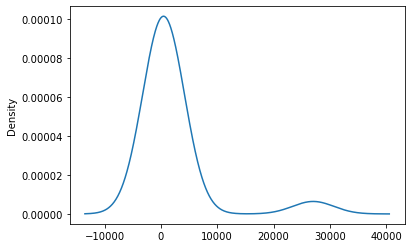

In [5]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
application_types.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(application_types[application_types < 500].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_values = application_df['CLASSIFICATION'].value_counts()
classification_values

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

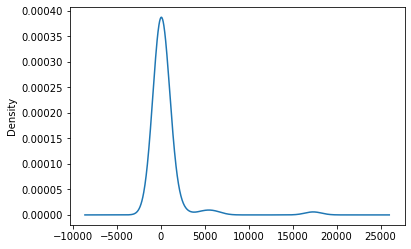

In [8]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_values.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(classification_values[classification_values < 500].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_category = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_category

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_category]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_category)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df, left_index=True,right_index=True)
application_df = application_df.drop(columns = application_category)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\h4mm4\.conda\envs\Pythondata\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Compile, Train and Evaluate the Model
##### Attempt 1 
Must be atleast better than values below. 
Loss: 0.6961942911148071, Accuracy: 0.5940524935722351


1. Add third layer 
2. double number of neurons 

In [15]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)

#saves every 5 minutes
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 10
nn1 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
#  YOUR CODE GOES HERE
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
#  YOUR CODE GOES HERE
nn1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                672       
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 963
Trainable params: 963
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model
#  YOUR CODE GOES HERE
nn1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

In [19]:
# Train the model
#  YOUR CODE GOES HERE
fit_mod = nn1.fit(
    X_train, y_train, epochs=50, callbacks=[cp_callback], validation_split=0.2
)

Epoch 1/50
630/644 [============================>.] - ETA: 0s - loss: 7226.2212 - accuracy: 0.4880
Epoch 1: saving model to checkpoints\weights.01.hdf5
644/644 [==============================] - 3s 3ms/step - loss: 7408.6592 - accuracy: 0.4879 - val_loss: 23825.6953 - val_accuracy: 0.4690
Epoch 2/50
629/644 [============================>.] - ETA: 0s - loss: 8883.7422 - accuracy: 0.4883
Epoch 2: saving model to checkpoints\weights.02.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 8689.4316 - accuracy: 0.4888 - val_loss: 559.9155 - val_accuracy: 0.5184
Epoch 3/50
624/644 [============================>.] - ETA: 0s - loss: 1996.1078 - accuracy: 0.5064
Epoch 3: saving model to checkpoints\weights.03.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 2219.6868 - accuracy: 0.5061 - val_loss: 22906.4336 - val_accuracy: 0.4690
Epoch 4/50
635/644 [============================>.] - ETA: 0s - loss: 4694.0459 - accuracy: 0.4833
Epoch 4: saving model to checkpoi

Epoch 30/50
631/644 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 30: saving model to checkpoints\weights.30.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 31/50
631/644 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 31: saving model to checkpoints\weights.31.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 32/50
640/644 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 32: saving model to checkpoints\weights.32.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6913 - val_accuracy: 0.5310
Epoch 33/50
633/644 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 33: saving model to checkpoints\weights.33.hdf5
644

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6167 - accuracy: 0.7187 - 447ms/epoch - 2ms/step
Loss: 0.6167017817497253, Accuracy: 0.7187172174453735


In [21]:
nn1.save('AlphabetSoupCharity-opt1.h5')

<AxesSubplot:>

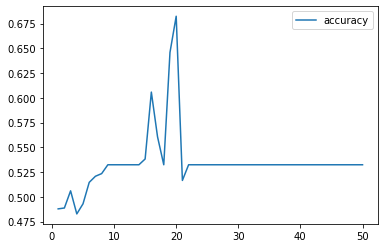

In [22]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_mod.history, index=range(1,len(fit_mod.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

<AxesSubplot:>

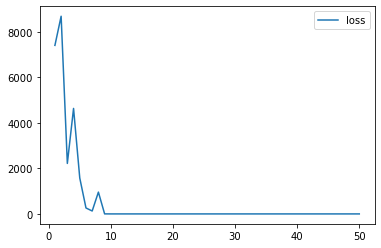

In [23]:
history_df.plot(y="loss")

### Optimization Attempt 2

1. Keep layer 3 
2. increase number of neurons
3. Change second layer activation to "sigmoid"

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  40
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20
nn2 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))
# Second hidden layer
#  YOUR CODE GOES HERE
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
#  YOUR CODE GOES HERE
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                1680      
                                                                 
 dense_5 (Dense)             (None, 20)                820       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,941
Trainable params: 2,941
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
#  YOUR CODE GOES HERE
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [26]:
# Train the model
#  YOUR CODE GOES HERE
fit_mod = nn2.fit(
    X_train, y_train, epochs=50, callbacks=[cp_callback], validation_split=0.2
)

Epoch 1/50
627/644 [============================>.] - ETA: 0s - loss: 0.6921 - accuracy: 0.5326
Epoch 1: saving model to checkpoints\weights.01.hdf5
644/644 [==============================] - 3s 3ms/step - loss: 0.6923 - accuracy: 0.5320 - val_loss: 0.6913 - val_accuracy: 0.5310
Epoch 2/50
631/644 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.5275
Epoch 2: saving model to checkpoints\weights.02.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.6919 - accuracy: 0.5278 - val_loss: 0.6923 - val_accuracy: 0.5310
Epoch 3/50
635/644 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5302
Epoch 3: saving model to checkpoints\weights.03.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.6917 - accuracy: 0.5302 - val_loss: 0.6914 - val_accuracy: 0.5310
Epoch 4/50
637/644 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5329
Epoch 4: saving model to checkpoints\weights.04.hdf5
644/644 [==

641/644 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 30: saving model to checkpoints\weights.30.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 31/50
633/644 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 31: saving model to checkpoints\weights.31.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 32/50
643/644 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 32: saving model to checkpoints\weights.32.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 33/50
627/644 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 33: saving model to checkpoints\weights.33.hdf5
644/644 [======

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6905 - accuracy: 0.5332 - 545ms/epoch - 2ms/step
Loss: 0.6904687881469727, Accuracy: 0.5331778526306152


<AxesSubplot:>

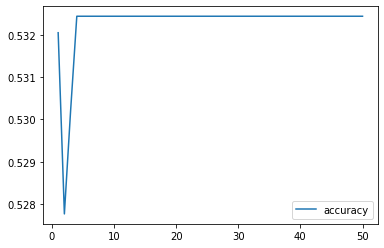

In [28]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_mod.history, index=range(1,len(fit_mod.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

<AxesSubplot:>

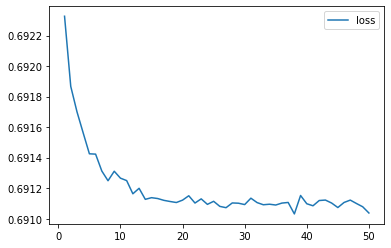

In [29]:
history_df.plot(y="loss")

In [30]:
nn2.save('AlphabetSoupCharity-opt2.h5')

### Optimization Attempt 3
1. Increase number of neurons further 
2. Remove layer 3
2. Change the activation for layer 1 to "relu"

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 80
nn3 = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
# Second hidden layer
#  YOUR CODE GOES HERE
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
#  YOUR CODE GOES HERE
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               4200      
                                                                 
 dense_9 (Dense)             (None, 80)                8080      
                                                                 
 dense_10 (Dense)            (None, 1)                 81        
                                                                 
Total params: 12,361
Trainable params: 12,361
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
#  YOUR CODE GOES HERE
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Train the model
#  YOUR CODE GOES HERE
fit_mod = nn3.fit(
    X_train, y_train, epochs=50, callbacks=[cp_callback], validation_split=0.2
)

Epoch 1/50
637/644 [============================>.] - ETA: 0s - loss: 136362.4062 - accuracy: 0.4911
Epoch 1: saving model to checkpoints\weights.01.hdf5
644/644 [==============================] - 3s 4ms/step - loss: 137063.5625 - accuracy: 0.4912 - val_loss: 352412.8438 - val_accuracy: 0.5310
Epoch 2/50
640/644 [============================>.] - ETA: 0s - loss: 87079.6250 - accuracy: 0.5121
Epoch 2: saving model to checkpoints\weights.02.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 86667.6094 - accuracy: 0.5125 - val_loss: 2711.5381 - val_accuracy: 0.5310
Epoch 3/50
634/644 [============================>.] - ETA: 0s - loss: 67528.2031 - accuracy: 0.4840
Epoch 3: saving model to checkpoints\weights.03.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 66622.0078 - accuracy: 0.4838 - val_loss: 13110.7656 - val_accuracy: 0.4690
Epoch 4/50
644/644 [==============================] - ETA: 0s - loss: 5275.7256 - accuracy: 0.4952
Epoch 4: saving model t

Epoch 30/50
642/644 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 30: saving model to checkpoints\weights.30.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5324 - val_loss: 0.6919 - val_accuracy: 0.5310
Epoch 31/50
627/644 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5327
Epoch 31: saving model to checkpoints\weights.31.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.6913 - accuracy: 0.5324 - val_loss: 0.6912 - val_accuracy: 0.5310
Epoch 32/50
635/644 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5323
Epoch 32: saving model to checkpoints\weights.32.hdf5
644/644 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5324 - val_loss: 0.6914 - val_accuracy: 0.5310
Epoch 33/50
642/644 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 33: saving model to checkpoints\weights.33.hdf5
644

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6483 - accuracy: 0.6166 - 491ms/epoch - 2ms/step
Loss: 0.6482833623886108, Accuracy: 0.6165597438812256


<AxesSubplot:>

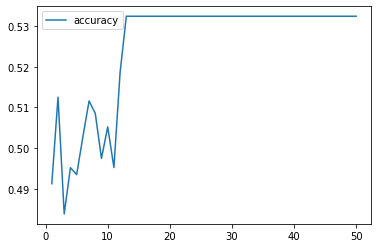

In [35]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_mod.history, index=range(1,len(fit_mod.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")

<AxesSubplot:>

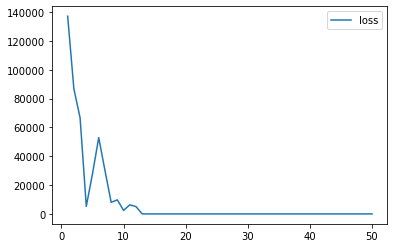

In [36]:
history_df.plot(y="loss")

In [37]:
nn3.save('AlphabetSoupCharity-opt3.h5')